# Predict Sun Power by Scikit Learn
* scikit learn
* pandas
* numpy

In [17]:
import pandas as pd
import numpy as np

In [2]:
data = 'sun.csv'
df = pd.read_csv(data)
print("訓練檔案總資料數量 : ",df.shape[0])
df.head()

訓練檔案總資料數量 :  46


,datetime,AtPressure,CO2,Current,Humidity,Infrared,Luminance,Temperature,UV,Volt,Power
0,2020/3/31 17:00,1005.75,408.475433,None,47.5068359,7048,7096,None,None,12.6285456,118.275862
1,2020/3/31 18:00,None,None,-14.611111,None,None,None,None,None,12.6190109,187.333333
2,2020/4/1 12:00,1008.46997,419.59877,117,47.0610352,81940,79519,32.1000004,6.48500013,12.5633332,1480
3,2020/4/1 14:00,1006.45793,416.816927,123.849057,46.7324555,48422.4138,46620.5517,31.797931,3.7989655,12.5879246,1557.35849
4,2020/4/1 15:00,1006.40341,417.81227,112.073446,45.4353082,37417.4444,33876.1667,31.9553331,2.76056181,12.5716382,1408.47458


In [3]:
print("刪除第一個column :'datetime'")
df.pop('datetime')
df.head()

刪除第一個column :'datetime'


,AtPressure,CO2,Current,Humidity,Infrared,Luminance,Temperature,UV,Volt,Power
0,1005.75,408.475433,None,47.5068359,7048,7096,None,None,12.6285456,118.275862
1,None,None,-14.611111,None,None,None,None,None,12.6190109,187.333333
2,1008.46997,419.59877,117,47.0610352,81940,79519,32.1000004,6.48500013,12.5633332,1480
3,1006.45793,416.816927,123.849057,46.7324555,48422.4138,46620.5517,31.797931,3.7989655,12.5879246,1557.35849
4,1006.40341,417.81227,112.073446,45.4353082,37417.4444,33876.1667,31.9553331,2.76056181,12.5716382,1408.47458


In [4]:
print("刪除Power為None的資料..")
df = df.replace('None',np.nan)
df = df[df.Power != 'None']
print("剩餘資料數：",df.shape)
print("刪除factor為None的資料..")
df = df.dropna()
print("剩餘資料數：",df.shape)

刪除Power為None的資料..
剩餘資料數： (46, 10)
刪除factor為None的資料..
剩餘資料數： (33, 10)


In [5]:
df = df.astype(float)
df.dtypes

AtPressure     float64
CO2            float64
Current        float64
Humidity       float64
Infrared       float64
Luminance      float64
Temperature    float64
UV             float64
Volt           float64
Power          float64
dtype: object

### Split Data

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x = df.iloc[:,0:9].values
y = df['Power'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('訓練資料：',len(X_train))
print('預測資料：',len(X_test))

訓練資料： 26
預測資料： 7


### SKLearn Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
predict_y = model.predict(X_test)
print('predict y:',predict_y)
print()
print("grounf truth:",y_test)

predict y: [2227.2355478  1074.25208918  712.1910537    34.88190378 1609.78353105
 2368.72569126 1732.37031399]

grounf truth: [2320.38462  1000.27778   686.216216   60.       1480.       2412.65537
 1680.      ]


### Power Class

In [12]:
max_power = max(y)
power_class = []
print('max_power :',max_power)
div = max_power//5
for i in range(0,5):
    power_class.append(div*i) 
power_class.append(max_power)
print(power_class)

max_power : 2412.72727
[0.0, 482.0, 964.0, 1446.0, 1928.0, 2412.72727]


### Power Y to Class

In [13]:
def power2class(power_class,arr):
    arr_class = []
    for i in range(len(arr)):
        for j in range(len(power_class)):
            if arr[i]>power_class[j] and arr[i] < power_class[j+1]:
                arr_class.append(j)
                break
            elif arr[i] > power_class[len(power_class)-1] :
                arr_class.append(len(power_class)-1)
                break
    return arr_class

In [24]:
predict_y_class = power2class(power_class,predict_y)
test_y_class = power2class(power_class,y_test)

print('After tranfer number to class..')
print('Answer :',test_y_class)
print('Predict:',predict_y_class)


After tranfer number to class..
Answer : [4, 2, 1, 0, 3, 4, 3]
Predict: [4, 2, 1, 0, 3, 4, 3]


### confusion_matrix


In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools


class_labels = []
for i in range(len(power_class)-1):
    class_labels.append(i)

cm = confusion_matrix(test_y_class,predict_y_class,labels=class_labels)


In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [41]:
cm

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 2]])

Confusion matrix, without normalization
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 2 0]
 [0 0 0 0 2]]
Normalized confusion matrix
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


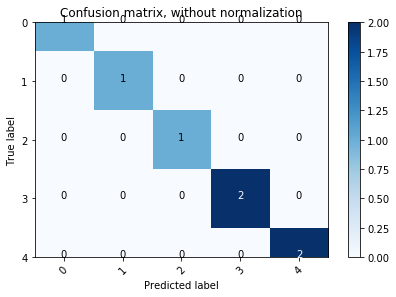

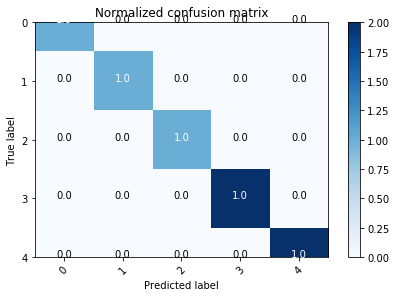

In [42]:

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()